# Density_difference_based_clustering

# Python functions to execute the three steps

## Step 1 : computing the discrepancy measure -- and a 2D embedding

### Options

The options of the <b>step1</b> method in the next cell are:
 - <em>points1</em>: First input file in matrix format 
 - <em>points2</em>: Second input file in matrix format
 - <em>theta0</em>: theta0 parameter for the random multiplexer
 - <em>kofnPower</em>: Power p in kofn=k^p, to set the number of neighbors used by the regressor
 - <em>resampling</em>: Number of iterations of the resampling process

In [1]:
from SBL.SBL_pytools import SBL_pytools as sblpyt
#help(sblpyt)
import re  #regular expressions
import sys #misc system
import os
import pdb
import shutil # python 3 only



def step1(odir, points1, points2, theta0 = 0.5, kofnPower = 0.66, resampling = 1):
   
    if os.path.exists(odir):
        os.system("rm -rf %s" % odir)
    os.system( ("mkdir %s" % odir) )
    
    # check executable exists and is visible
    exe = shutil.which("sbl-ddbc-step1-discrepancy.py")
    exe_opt = shutil.which("sbl-ddbc-2D-colored-embedding.py")
    
    if exe and exe_opt:
        print(("Using executable %s\n" % exe))
        cmd = "sbl-ddbc-step1-discrepancy.py -f %s -g %s --directory %s" % (points1, points2, odir)
        cmd += "  --theta0 %f --kofn-power %f -B %d > log.txt" % (theta0, kofnPower, resampling)
        print(("Running %s" % cmd))
        os.system(cmd)       
       
        #sblpyt.show_log_file(odir)
       
        cmd = "ls %s" % odir
        ofnames = os.popen(cmd).readlines()      
        prefix = os.path.splitext(ofnames[0])[0]
        
        cmd = "%s -f %s/%s" % (exe_opt, odir, prefix)
        print(("Running %s" % cmd))
        os.system(cmd)
        
  
        print("All output files:")
        print(os.popen(cmd).readlines())
         
        images = []
        images.append( sblpyt.find_and_convert("2Dembedding-discrepancy.png", odir, 100) )
        images.append( sblpyt.find_and_convert("2Dembedding-populations.png", odir, 100) )
        print(images)
        sblpyt.show_row_n_images(images, 100)
    else:
        print("Executable not found")
        

        


## Step 2 : Clustering samples via persistence based analysis

### Options

The options of the <b>step1</b> method in the next cell are:
 - <em>points</em>: Samples in point d format
 - <em>weights</em>: Elevation file
 - <em>n</em>: Number of neighbors used to build the Nearest Neighbors Graph
 - <em>P</em>: Order preserving perturbation of heights to break ties between neighboring samples
 - <em>rho</em>: Persistence threshold rho
 - <em>deltamax</em>: Sublevelset threshold deltaMax

In [2]:
def step2(odir, ifn_points, ifn_weights, n = 6, P = True, rho = 0.1, deltamax = 0.1):        
    # check executable exists and is visible
    exe = shutil.which("sbl-ddbc-step2-clustering.py")
    if exe:
        print(("Using executable %s\n" % exe))
        cmd = "sbl-ddbc-step2-clustering.py -p %s/%s -w %s/%s -d %s -v" % (odir, ifn_points, odir, ifn_weights, odir)
        cmd += " -n %d --rho %f --deltamax %f" % (n, rho, deltamax)
        if P:
            cmd += " -P"
        cmd += " > log.txt"
        print(("Running %s"  % cmd))
        os.system(cmd)
        
        cmd = "ls %s" % odir
        ofnames = os.popen(cmd).readlines()
        print("All output files:",ofnames)
        prefix = os.path.splitext(ofnames[0])[0]  
           
        images = []
        images.append( sblpyt.find_and_convert("disconnectivity_forest.eps", odir, 100) )
        images.append( sblpyt.find_and_convert("persistence_diagram.pdf", odir, 100) )
        print(images)
        sblpyt.show_row_n_images(images, 100)
    else:
        print("Executable not found")
        

## Step 3 : Cluster decomposition

### Options

The options of the <b>step3</b> method in the next cell are:
 - <em>vertices</em>: Vertices filename generated in step 1 
 - <em>components</em>: Connected components filename generated in step 2 
 - <em>points</em>: Optional 2D embedding generated by sbl-ddbc-2D-colored-embedding.py

In [3]:
def step3(odir, ifn_vertices, ifn_clusters, ifn_points):
    # check executable exists and is visible
    exe = shutil.which("sbl-ddbc-step3-cluster-plots.py")
    if exe:
        print(("Using executable %s\n" % exe))
        cmd = "sbl-ddbc-step3-cluster-plots.py -f %s/%s -c %s/%s -p %s/%s > log.txt" % \
            (odir,ifn_vertices, odir, ifn_clusters, odir, ifn_points)
        print(("Running %s" % cmd))
        os.system(cmd)
        
        #log = open("log.txt").readlines()
        #for line in log:         print(line.rstrip())
        
        images = []
        images.append( sblpyt.find_and_convert("step3-2Dembedding-clusters.png", odir, 100) )
        images.append( sblpyt.find_and_convert("step3-bars.png", odir, 100) )
        images.append( sblpyt.find_and_convert("step3-discrepancy-cumulative-distribution.png", odir, 100) )
        sblpyt.show_row_n_images(images, 100)
        print(images)
    else:
        print("Executable not found")

# Illustration 1: ellipsis in 2D

## Step 1: computing the discrepancy

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step1-discrepancy.py

Running sbl-ddbc-step1-discrepancy.py -f data/ellipse_w_2_h_10_n_1000__X.dat -g data/ellipse_w_2_h_10_n_1000__Y.dat --directory exple-ellipsis  --theta0 0.500000 --kofn-power 0.660000 -B 1 > log.txt
Running /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-2D-colored-embedding.py -f exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y
All output files:
[]
['exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y-step2-2Dembedding-discrepancy.png', 'exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y-step2-2Dembedding-populations.png']


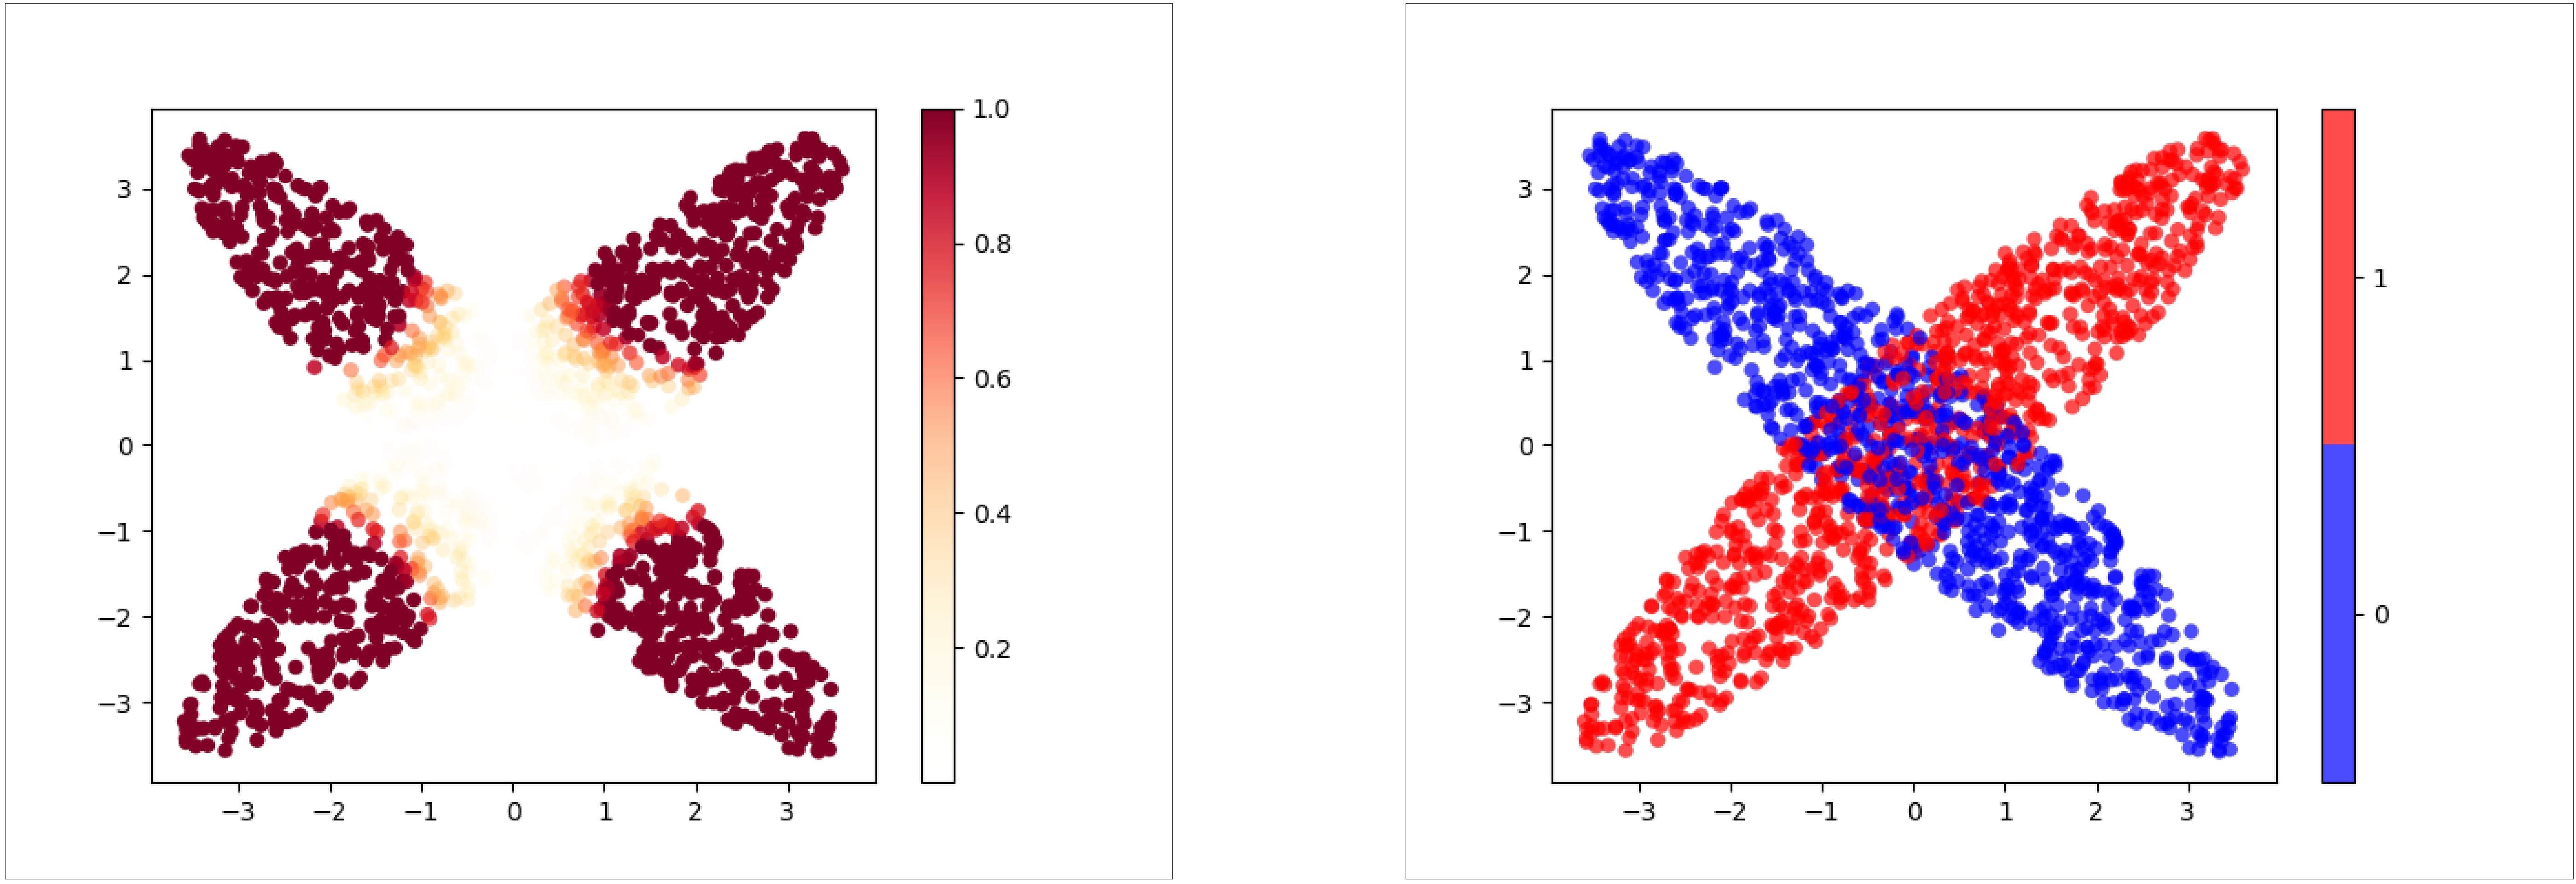

Figs displayed
Marker : Calculation Ended


In [4]:
print("Marker : Calculation Started")
odir_ellipsis = "exple-ellipsis"
step1(odir_ellipsis, "data/ellipse_w_2_h_10_n_1000__X.dat", "data/ellipse_w_2_h_10_n_1000__Y.dat")         
print("Marker : Calculation Ended")

## Step 2: persistence based analysis

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step2-clustering.py

Running sbl-ddbc-step2-clustering.py -p exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.pointd -w exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.heightDiv -d exple-ellipsis -v -n 6 --rho 0.100000 --deltamax 0.100000 -P > log.txt


496 471 564 439 

All output files: ['ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.2Dpoints\n', 'ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.heightDiv\n', 'ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.pointd\n', 'ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y-step2-2Dembedding-discrepancy.png\n', 'ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y-step2-2Dembedding-populations.png\n', 'ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.vertices\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.eps\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__MSW_chain_complex.xml\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__nng.xml\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.pdf\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.plot\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.txt\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_histogram.pdf\n', 'sbl-Morse-theory-based-a

convert: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG `exple-ellipsis/sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.png' @ warning/png.c/MagickPNGWarningHandler/1668.


GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
['exple-ellipsis/sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.png', 'exple-ellipsis/sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.png']


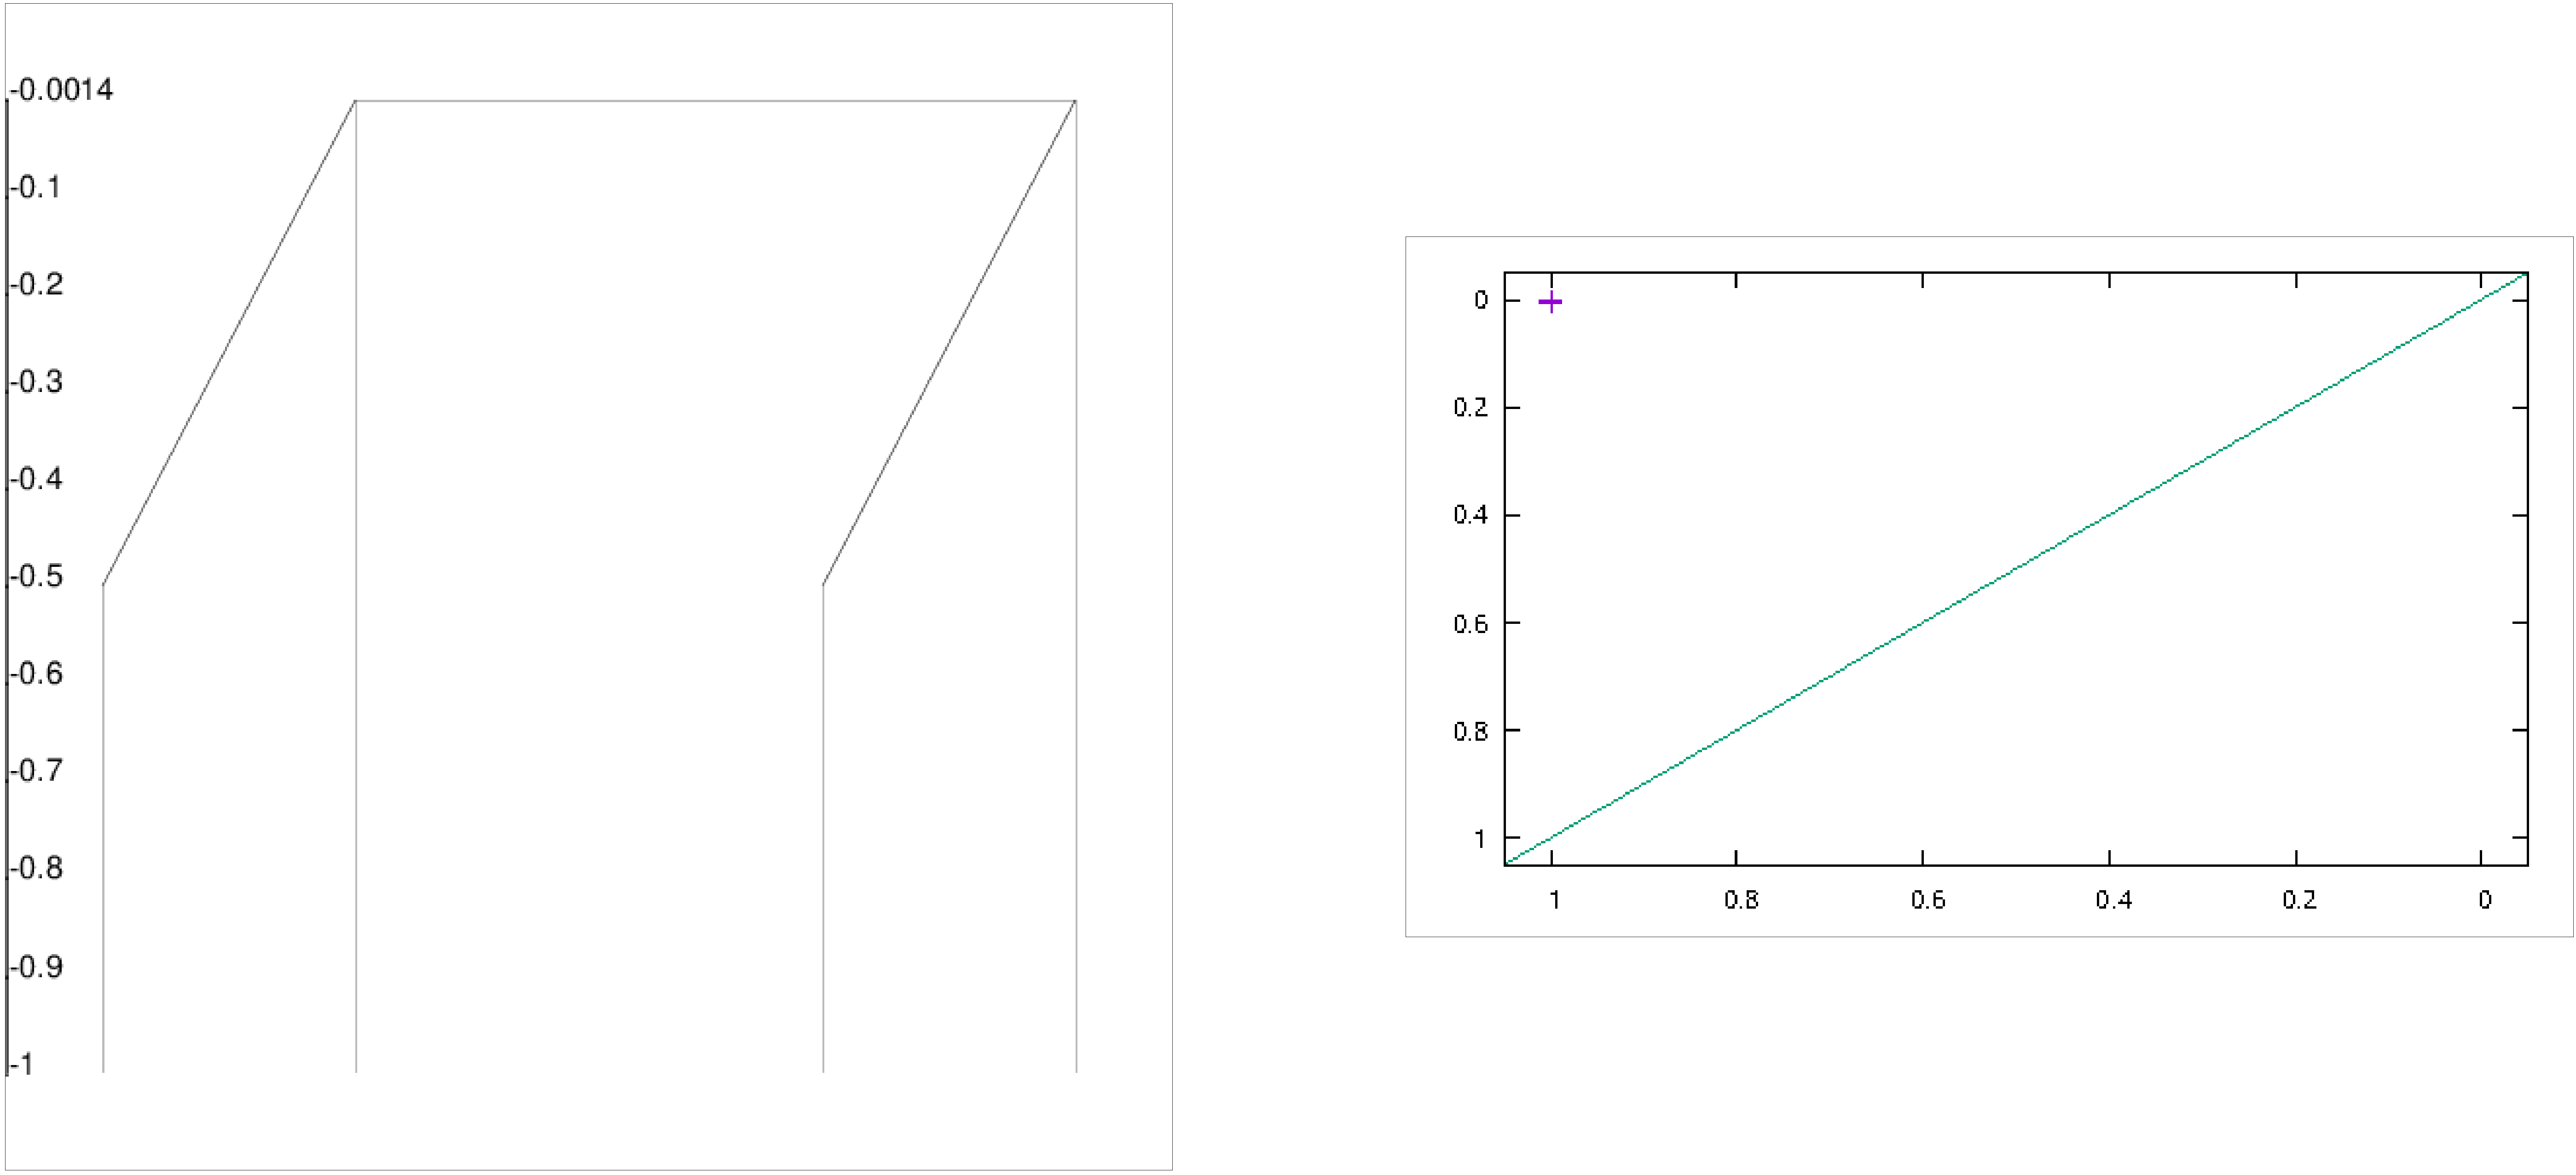

Figs displayed
Marker : Calculation Ended


In [5]:
print("Marker : Calculation Started")
step2(odir_ellipsis, "ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.pointd",
      "ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.heightDiv")         
print("Marker : Calculation Ended")

## Step 3: visualization of clusters

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step3-cluster-plots.py

Running sbl-ddbc-step3-cluster-plots.py -f exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.vertices -c exple-ellipsis/sbl-Morse-theory-based-analyzer-nng-euclid__sublevelsets_connected_components.xml -p exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.2Dpoints > log.txt


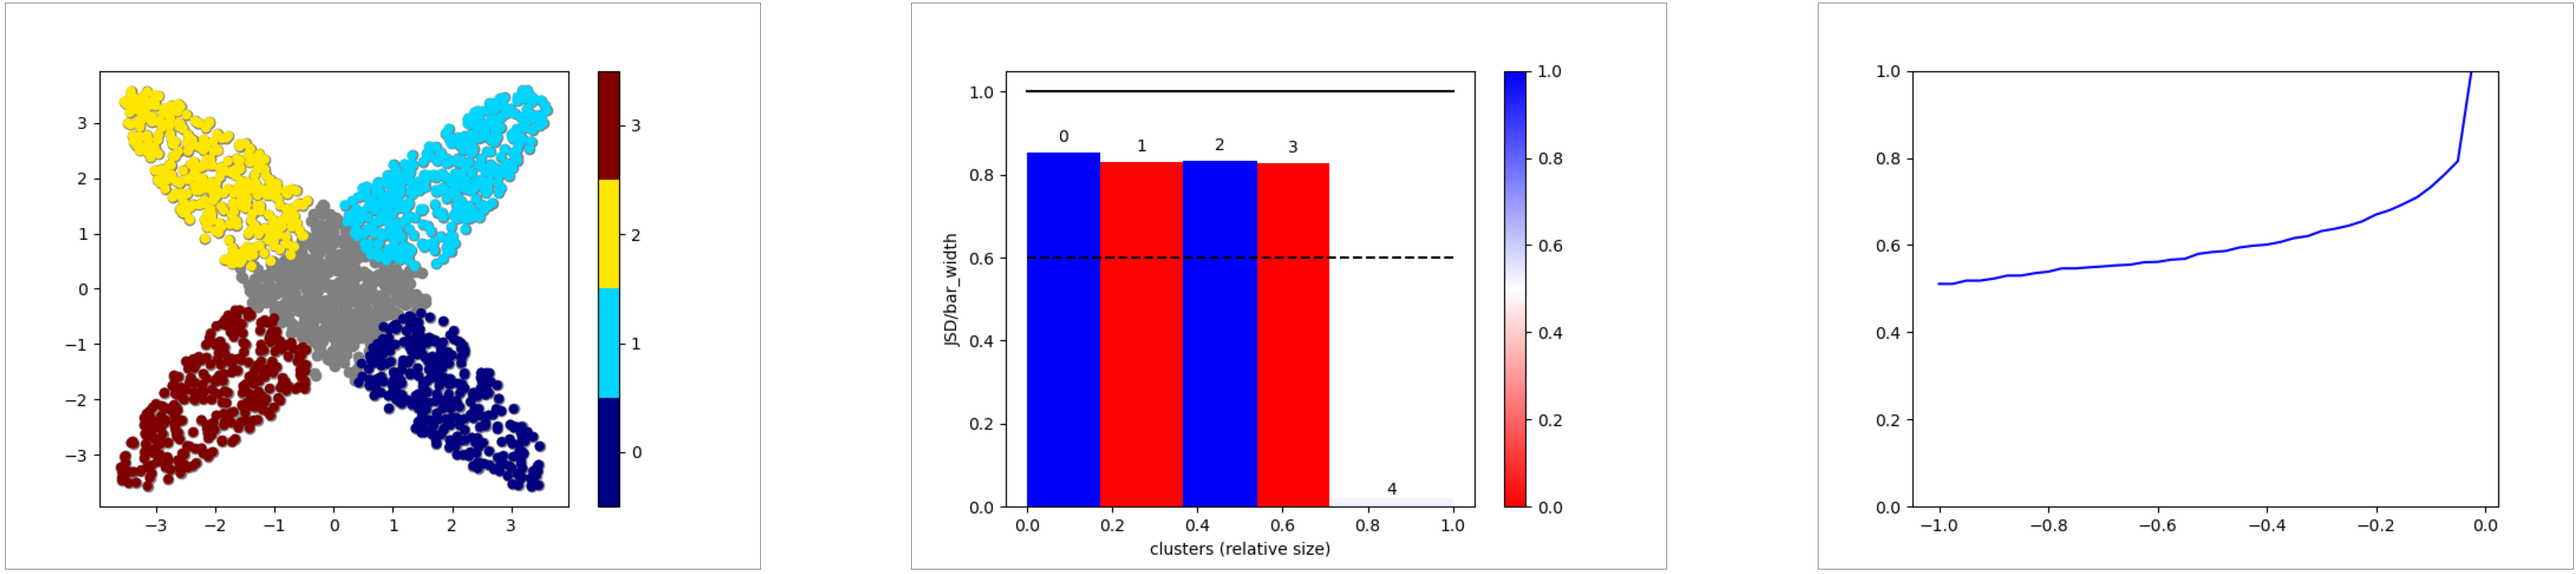

Figs displayed
['exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y-step3-2Dembedding-clusters.png', 'exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y-step3-bars.png', 'exple-ellipsis/ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y-step3-discrepancy-cumulative-distribution.png']
Marker : Calculation Ended


In [6]:
print("Marker : Calculation Started")
step3(odir_ellipsis, "ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.vertices",
      "sbl-Morse-theory-based-analyzer-nng-euclid__sublevelsets_connected_components.xml",
      "ellipse_w_2_h_10_n_1000__X_ellipse_w_2_h_10_n_1000__Y.2Dpoints")         
print("Marker : Calculation Ended")

# Illustration  2: 2D Gaussian 
Another 2D example, with two populations of 2000 points, each drawn from a Gaussian mixture

*  the first population: 2000 points drawn according to a mixture of four spherical Gaussians with equal probability.

* the second population: drawn according to a mixture of four non-spherical Gaussians with
equal probability.

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step1-discrepancy.py

Running sbl-ddbc-step1-discrepancy.py -f data/gaussianMixture6__d_2_n_2000_X.dat -g data/gaussianMixture6__d_2_n_2000_Y.dat --directory exple-gaussian  --theta0 0.500000 --kofn-power 0.660000 -B 1 > log.txt
Running /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-2D-colored-embedding.py -f exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y
All output files:
[]
['exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y-step2-2Dembedding-discrepancy.png', 'exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y-step2-2Dembedding-populations.png']


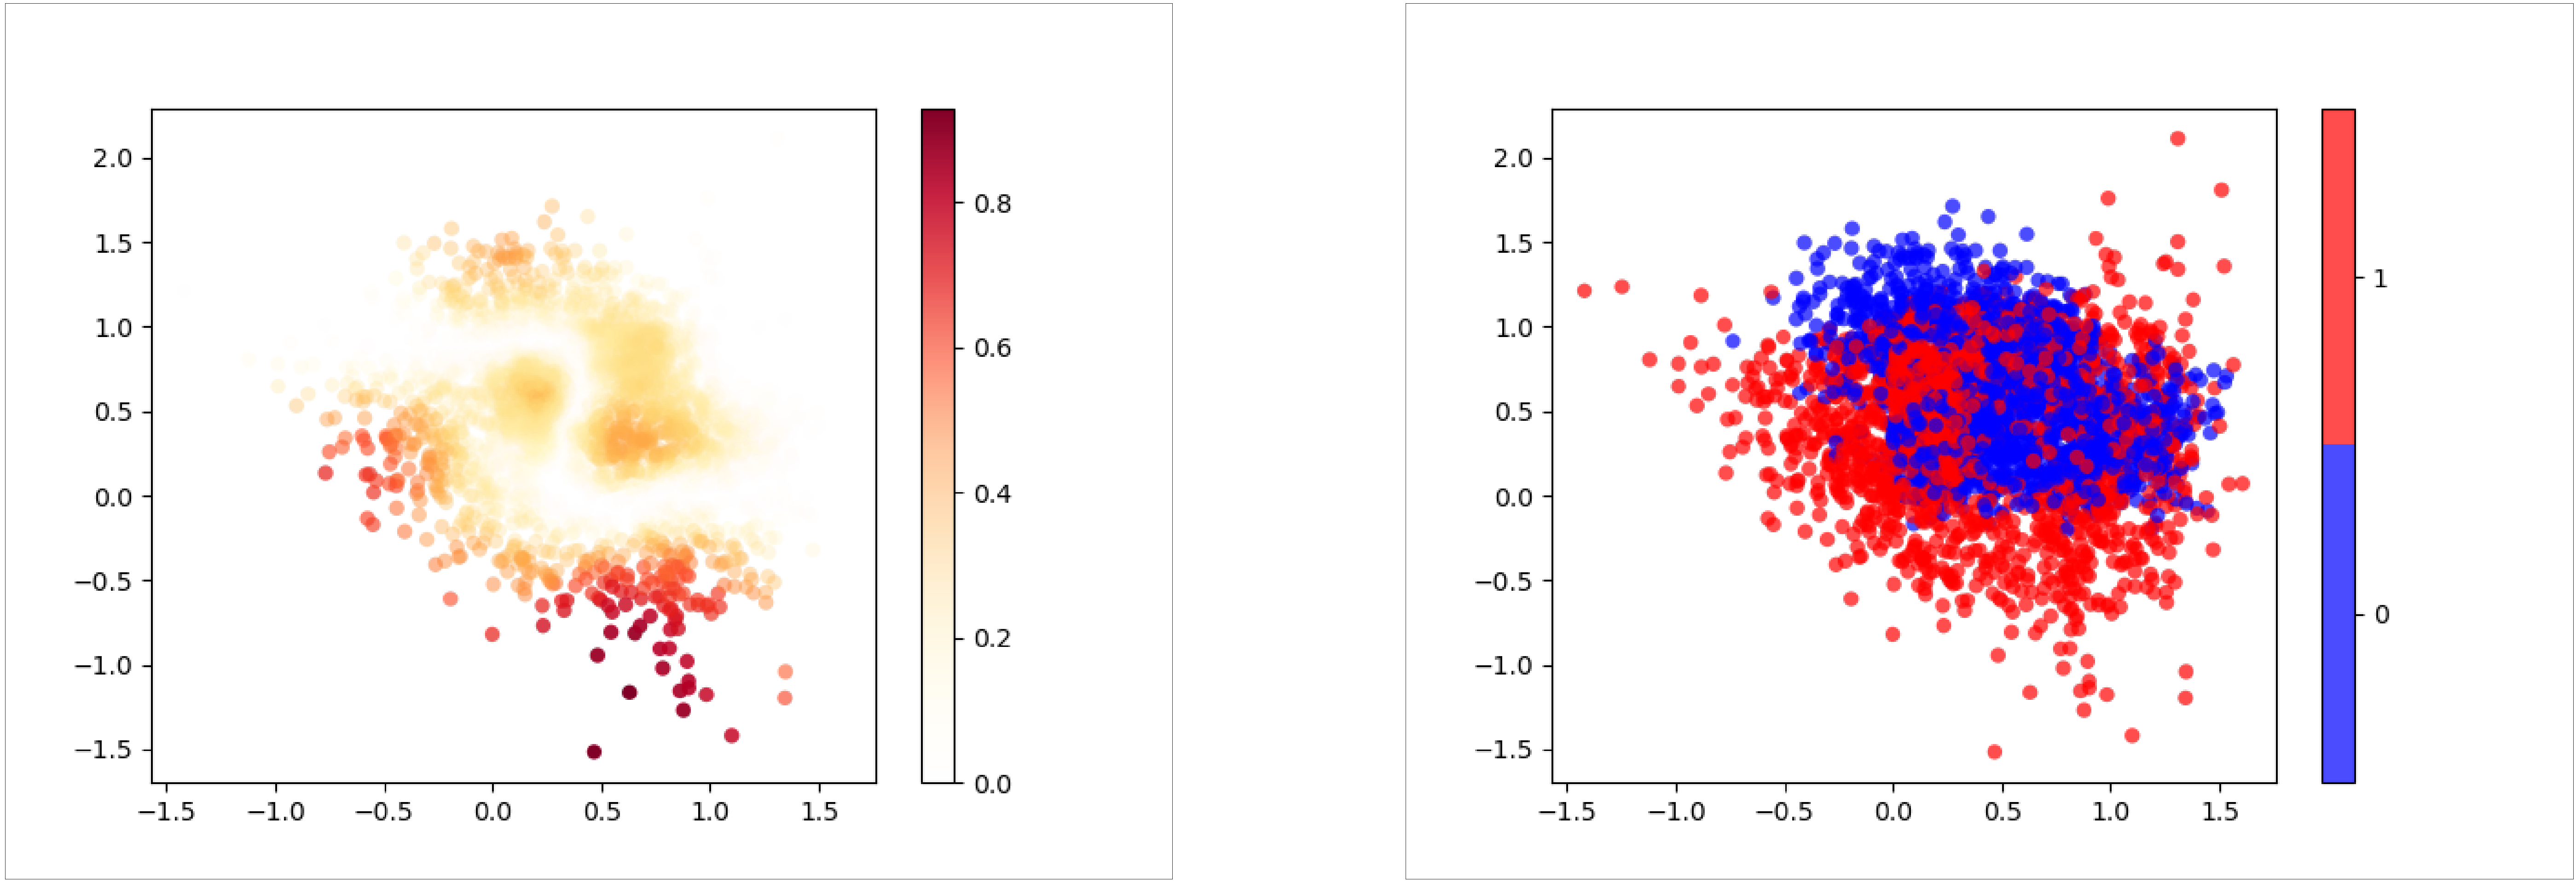

Figs displayed
Marker : Calculation Ended


In [7]:
print("Marker : Calculation Started")
odir_gaussian = "exple-gaussian"
step1(odir_gaussian, "data/gaussianMixture6__d_2_n_2000_X.dat", "data/gaussianMixture6__d_2_n_2000_Y.dat")      
print("Marker : Calculation Ended")

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step2-clustering.py

Running sbl-ddbc-step2-clustering.py -p exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.pointd -w exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.heightDiv -d exple-gaussian -v -n 6 --rho 0.100000 --deltamax 0.250000 -P > log.txt


190 277 569 550 1571 750 

All output files: ['gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.2Dpoints\n', 'gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.heightDiv\n', 'gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.pointd\n', 'gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y-step2-2Dembedding-discrepancy.png\n', 'gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y-step2-2Dembedding-populations.png\n', 'gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.vertices\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.eps\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__MSW_chain_complex.xml\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__nng.xml\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.pdf\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.plot\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.txt\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persist

convert: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG `exple-gaussian/sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.png' @ warning/png.c/MagickPNGWarningHandler/1668.


GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
['exple-gaussian/sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.png', 'exple-gaussian/sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.png']


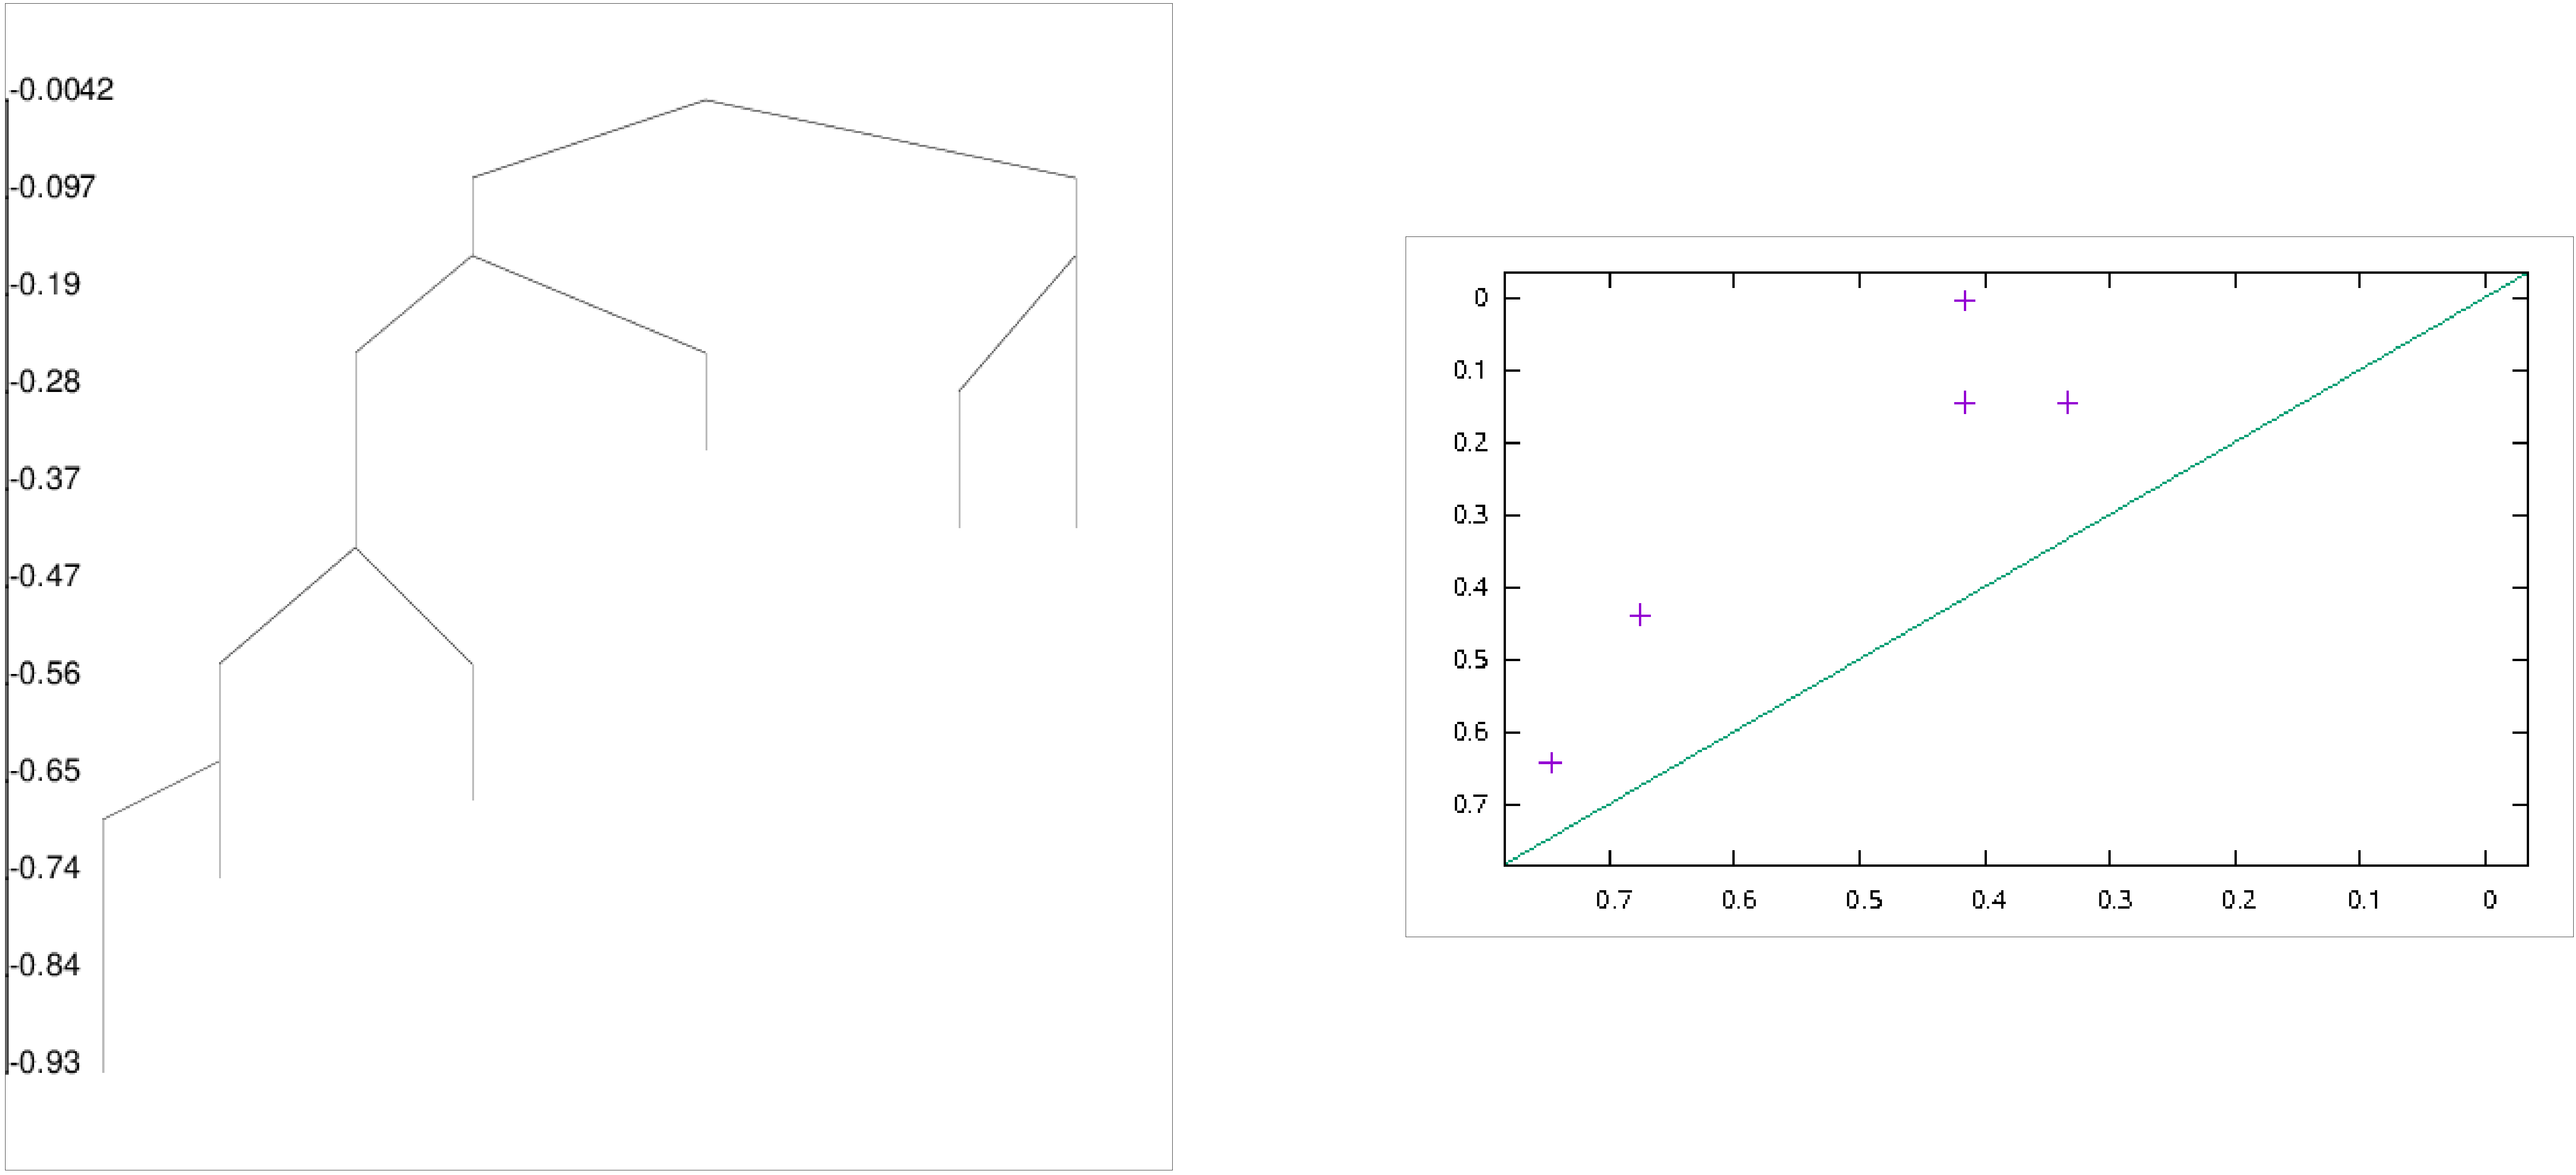

Figs displayed
Marker : Calculation Ended


In [8]:
print("Marker : Calculation Started")
step2(odir_gaussian, "gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.pointd",
      "gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.heightDiv", deltamax=0.25)
print("Marker : Calculation Ended")

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step3-cluster-plots.py

Running sbl-ddbc-step3-cluster-plots.py -f exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.vertices -c exple-gaussian/sbl-Morse-theory-based-analyzer-nng-euclid__sublevelsets_connected_components.xml -p exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.2Dpoints > log.txt


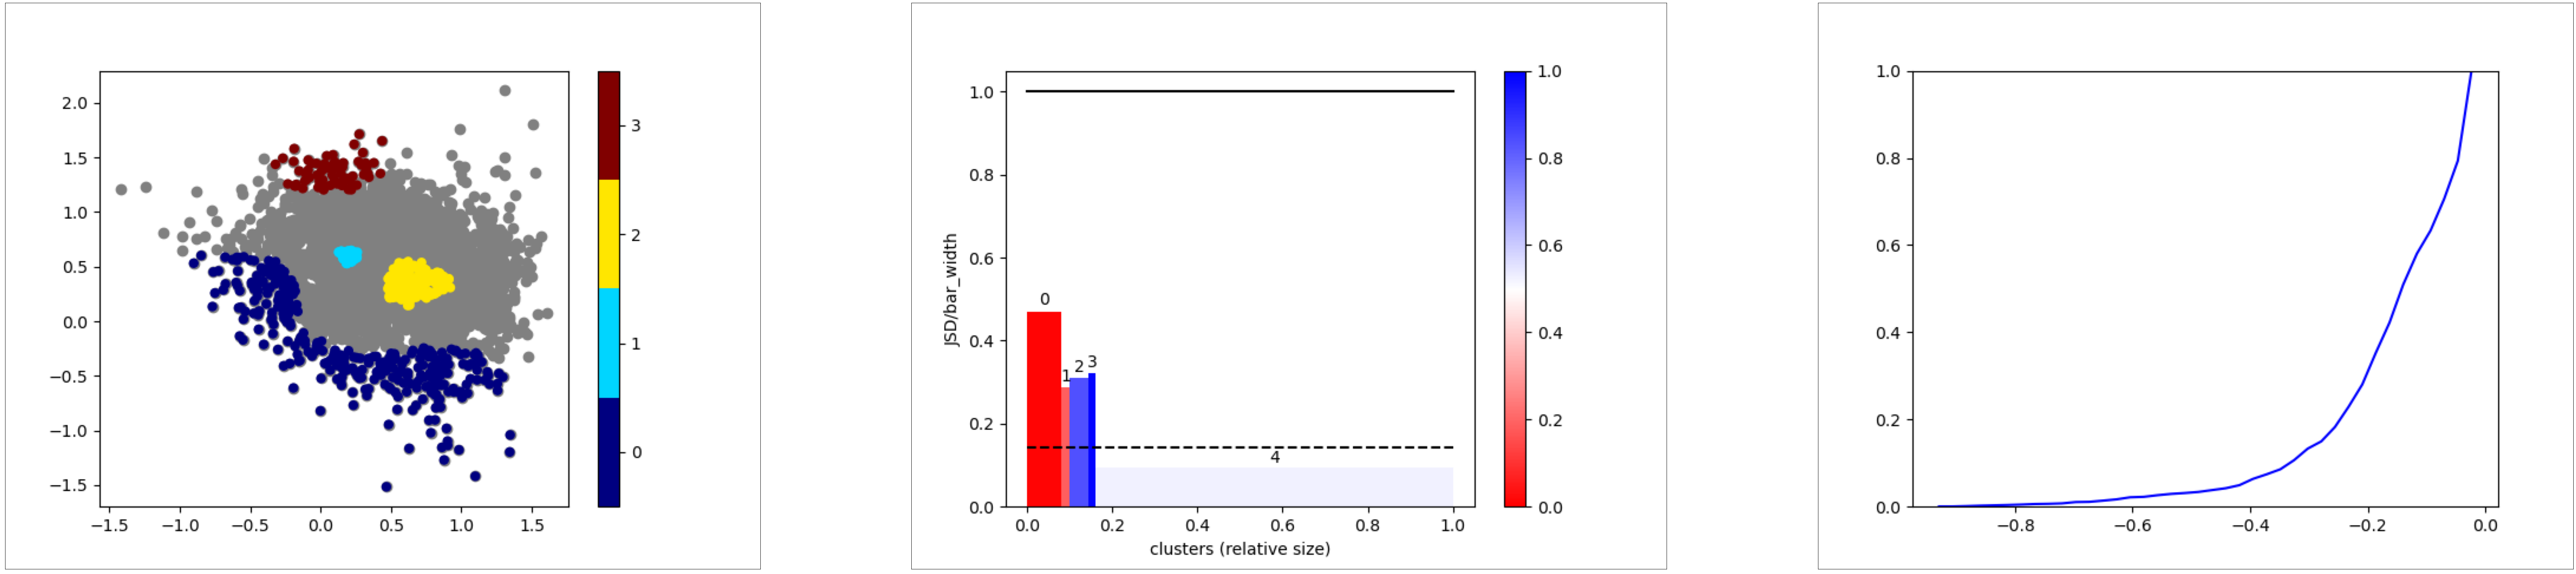

Figs displayed
['exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y-step3-2Dembedding-clusters.png', 'exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y-step3-bars.png', 'exple-gaussian/gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y-step3-discrepancy-cumulative-distribution.png']
Marker : Calculation Ended


In [9]:
print("Marker : Calculation Started")
step3(odir_gaussian, "gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.vertices",
      "sbl-Morse-theory-based-analyzer-nng-euclid__sublevelsets_connected_components.xml",
      "gaussianMixture6__d_2_n_2000_X_gaussianMixture6__d_2_n_2000_Y.2Dpoints")         
print("Marker : Calculation Ended")

# Illustration  3: high dim data
In the following, we process 2 x 1600 points en dimension 784, from the MNIST dataset

An example illustrating the processing of real data in high dimension,
we process a mixture of handwritten digits, each represented as an
28 x 28 gray-scale image -- see the MNIST dataset
\cite lecun1998mnist .

The two populations see also \ref fig-digits-in-out , were chosen as
follows:

* blue population, 1600 digits: 100 digits 3, 500 digits 6, and 1000 digits 8.

* red population, 1600 digits: 1000 digits 3, 500 digits 6, ans 100 digits 8.

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step1-discrepancy.py

Running sbl-ddbc-step1-discrepancy.py -f data/mnist368_100_500_1000_X.dat -g data/mnist368_1000_500_100_Y.dat --directory exple-mnist  --theta0 0.500000 --kofn-power 0.660000 -B 1 > log.txt
Running /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-2D-colored-embedding.py -f exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y
All output files:
[]
['exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y-step2-2Dembedding-discrepancy.png', 'exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y-step2-2Dembedding-populations.png']


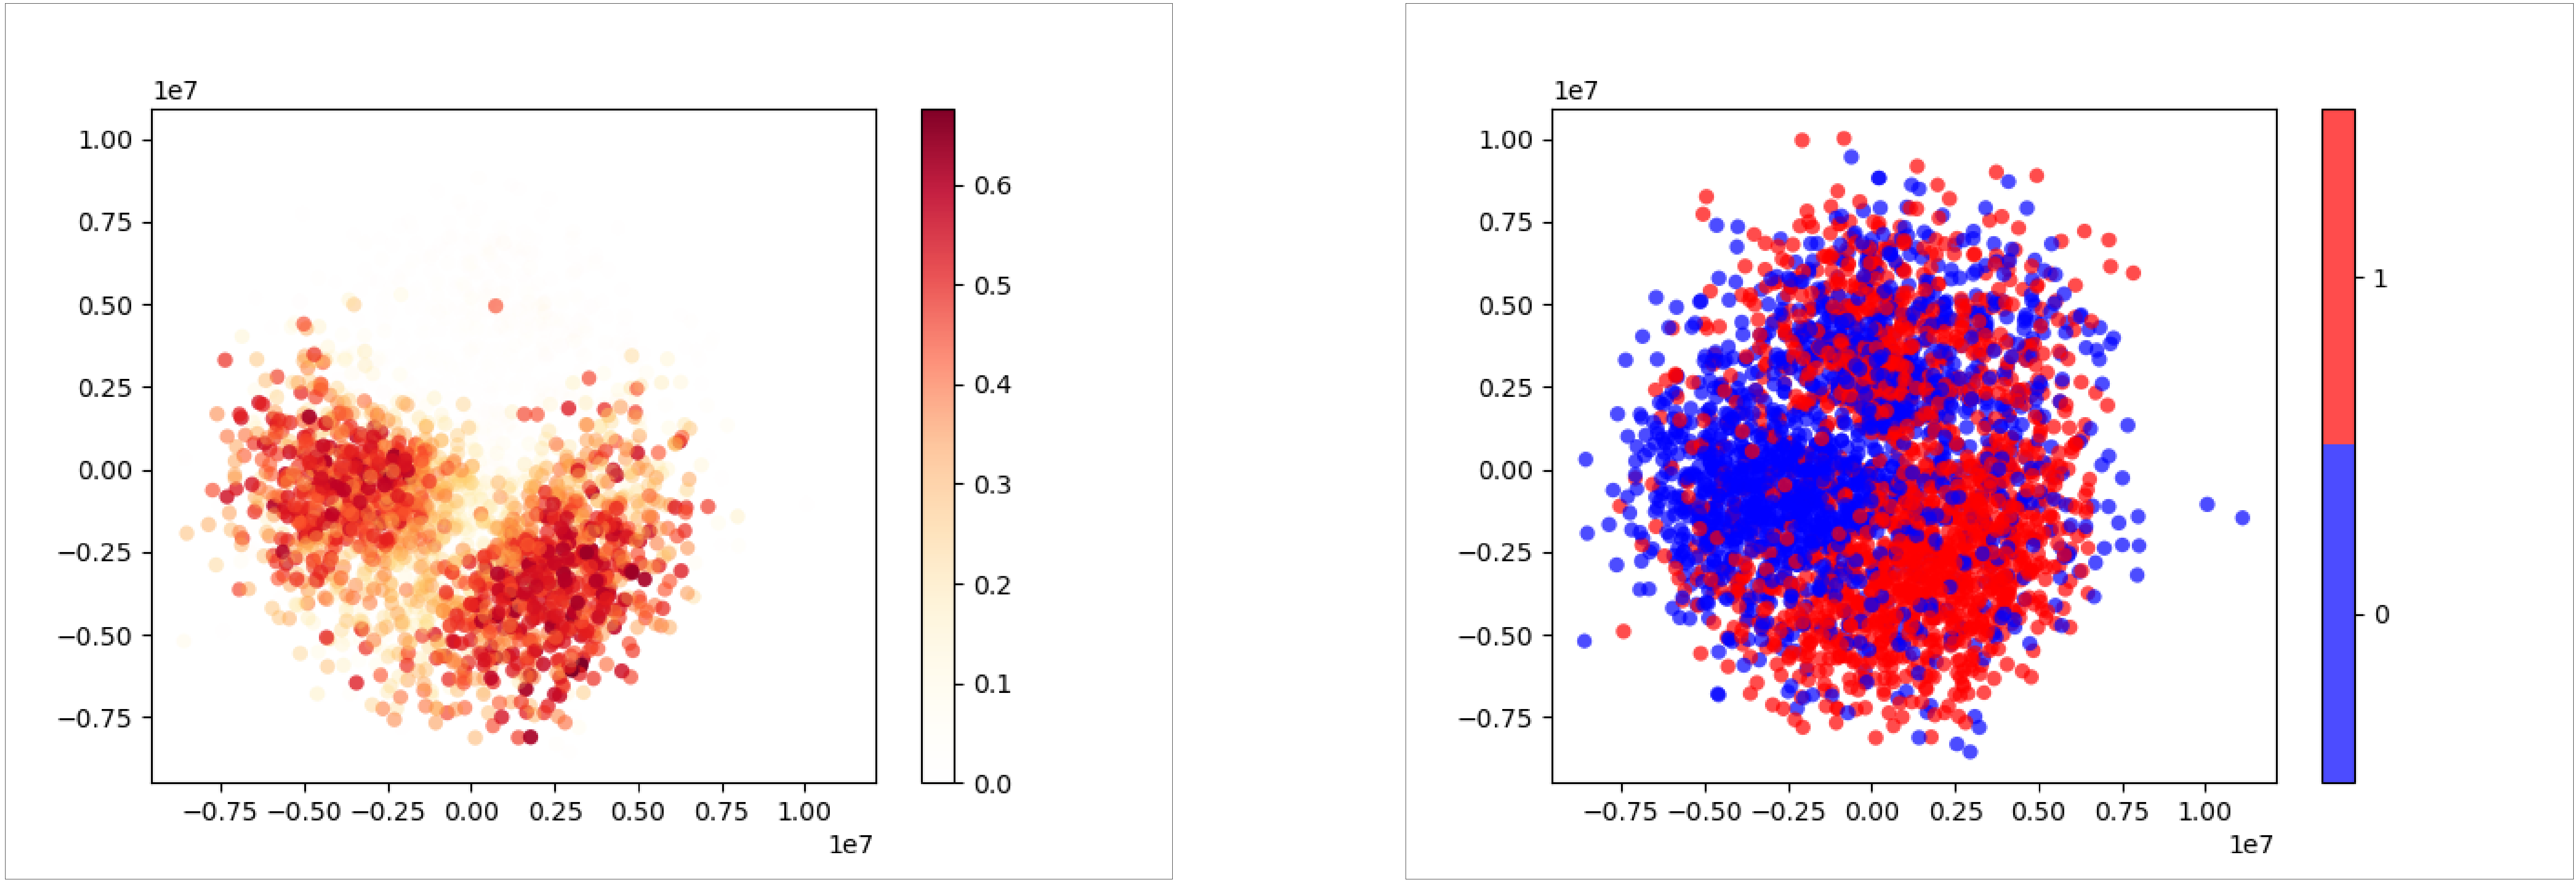

Figs displayed
Marker : Calculation Ended


In [10]:
print("Marker : Calculation Started")
odir_mnist = "exple-mnist"
step1(odir_mnist, "data/mnist368_100_500_1000_X.dat", "data/mnist368_1000_500_100_Y.dat")   
print("Marker : Calculation Ended")

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step2-clustering.py

Running sbl-ddbc-step2-clustering.py -p exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y.pointd -w exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y.heightDiv -d exple-mnist -v -n 30 --rho 0.100000 --deltamax 0.340000 -P > log.txt


1707 1417 Warning: empty x range [-0.657926:-0.657926], adjusting to [-0.664505:-0.651347]


All output files: ['mnist368_100_500_1000_X_mnist368_1000_500_100_Y.2Dpoints\n', 'mnist368_100_500_1000_X_mnist368_1000_500_100_Y.heightDiv\n', 'mnist368_100_500_1000_X_mnist368_1000_500_100_Y.pointd\n', 'mnist368_100_500_1000_X_mnist368_1000_500_100_Y-step2-2Dembedding-discrepancy.png\n', 'mnist368_100_500_1000_X_mnist368_1000_500_100_Y-step2-2Dembedding-populations.png\n', 'mnist368_100_500_1000_X_mnist368_1000_500_100_Y.vertices\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.eps\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__MSW_chain_complex.xml\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__nng.xml\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.pdf\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.plot\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.txt\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_histogram.pdf\n', 'sbl-Morse-theory-based-analyzer-nng-euclid__persistence_hist

convert: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG `exple-mnist/sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.png' @ warning/png.c/MagickPNGWarningHandler/1668.


Processing pages 1 through 1.
Page 1
['exple-mnist/sbl-Morse-theory-based-analyzer-nng-euclid__disconnectivity_forest.png', 'exple-mnist/sbl-Morse-theory-based-analyzer-nng-euclid__persistence_diagram.png']


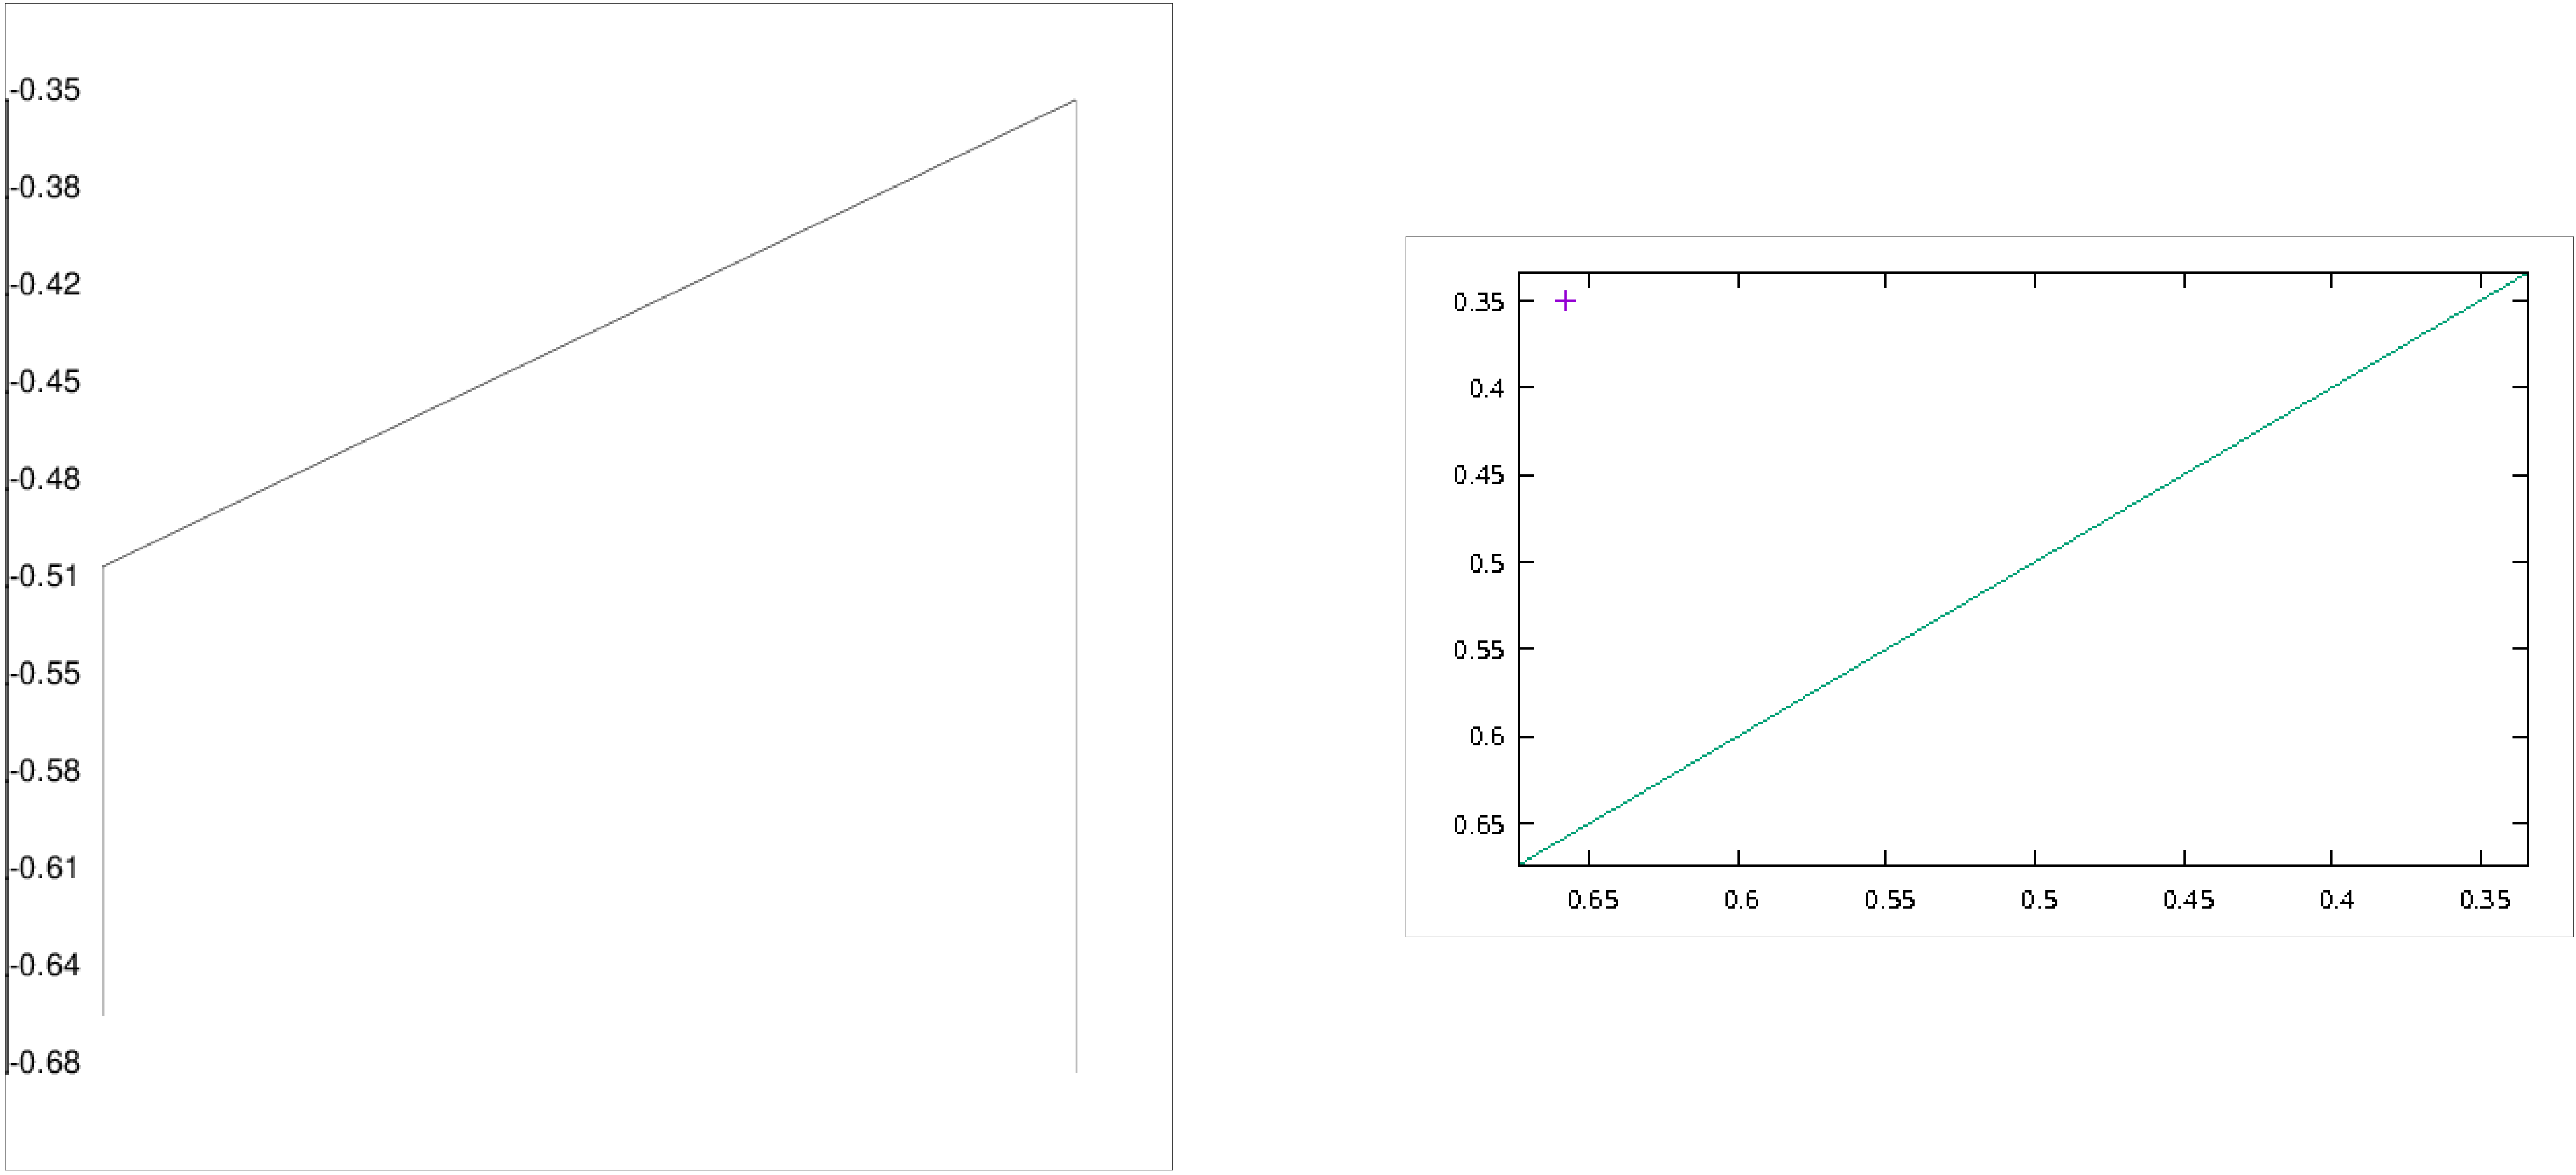

Figs displayed
Marker : Calculation Ended


In [11]:
print("Marker : Calculation Started")
step2(odir_mnist, "mnist368_100_500_1000_X_mnist368_1000_500_100_Y.pointd",\
      "mnist368_100_500_1000_X_mnist368_1000_500_100_Y.heightDiv", n=30, deltamax=0.34)
print("Marker : Calculation Ended")

Marker : Calculation Started
Using executable /user/nniclaus/home/miniconda3/envs/sbl-demo/bin/sbl-ddbc-step3-cluster-plots.py

Running sbl-ddbc-step3-cluster-plots.py -f exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y.vertices -c exple-mnist/sbl-Morse-theory-based-analyzer-nng-euclid__sublevelsets_connected_components.xml -p exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y.2Dpoints > log.txt


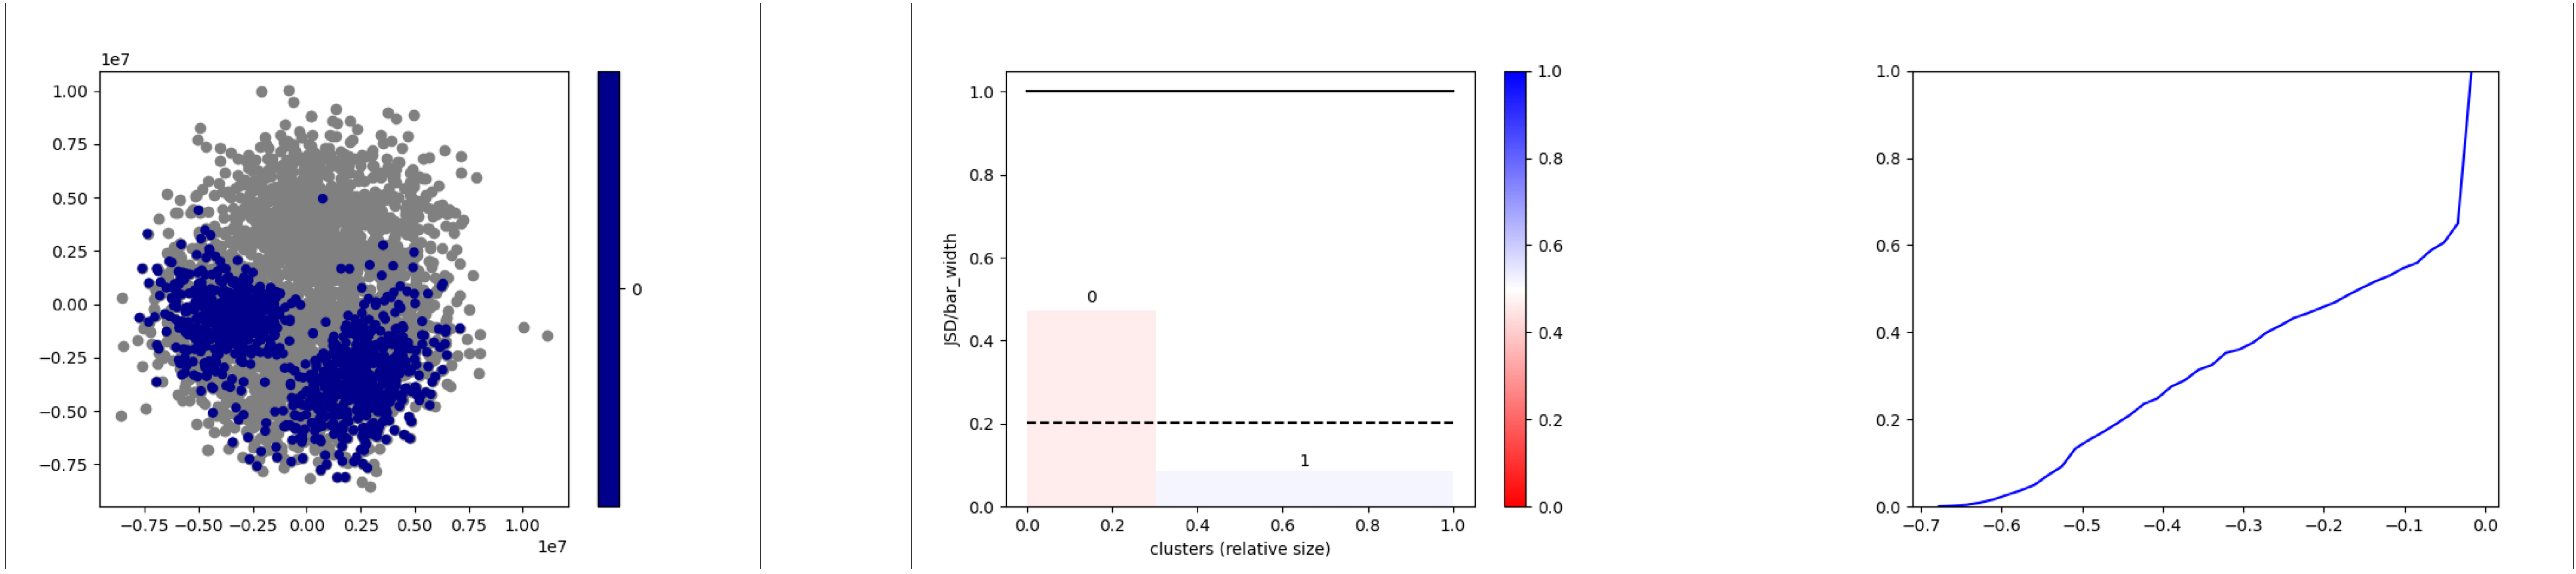

Figs displayed
['exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y-step3-2Dembedding-clusters.png', 'exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y-step3-bars.png', 'exple-mnist/mnist368_100_500_1000_X_mnist368_1000_500_100_Y-step3-discrepancy-cumulative-distribution.png']
Marker : Calculation Ended


In [12]:
print("Marker : Calculation Started")
step3(odir_mnist, "mnist368_100_500_1000_X_mnist368_1000_500_100_Y.vertices",
      "sbl-Morse-theory-based-analyzer-nng-euclid__sublevelsets_connected_components.xml",
      "mnist368_100_500_1000_X_mnist368_1000_500_100_Y.2Dpoints")         
print("Marker : Calculation Ended")